# TITANIC EDA to PREDICT

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction



>The sinking of the Titanic is one of the most infamous shipwrecks in history.
>On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

> ### Data Dictionary

>1. survival = Survival / 0 = No, 1 = Yes
2. pclass = Ticket class / 1 = 1st, 2 = 2nd, 3 = 3rd
3. sex = Sex 	
4. Age = Age in years 	
5. sibsp = of siblings / spouses aboard the Titanic 	
6. parch = of parents / children aboard the Titanic 	
7. ticket = Ticket number 	
8. fare = Passenger fare 	
9. cabin = Cabin number 	
10. embarked = Port of Embarkation / C = Cherbourg, Q = Queenstown, S = Southampton

> ### Variable Notes

>pclass: A proxy for socio-economic status (SES)
/1st = Upper
/2nd = Middle
/3rd = Lower

>age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

>sibsp: The dataset defines family relations in this way...
/Sibling = brother, sister, stepbrother, stepsister
/Spouse = husband, wife (mistresses and fiancés were ignored)

>parch: The dataset defines family relations in this way...
/Parent = mother, father
/Child = daughter, son, stepdaughter, stepson
/Some children travelled only with a nanny, therefore parch=0 for them.


In [77]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import missingo as msno


# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

ModuleNotFoundError: No module named 'missingo'

<a id='wrangling'></a>
## Data Wrangling

> After loading the datset, We are going to use Pandas to explore some helpful methods for assessing and building intuition about the dataset, then we are going to proceed with the cleaning process to include only the relavent data related to the questions I will apply on the dataset for the analysis process and delete the unused data.

In [12]:
# Load our data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

#loading the csv file and storing it in 'train_df'
train_df = pd.read_csv('train.csv')


#printing first five rows
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
# the last 3 rows

train_df.tail(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [16]:
# dimension

train_df.shape

(891, 12)

 > ### checking for cleaning

In [18]:
#checking for total null values

train_df.isnull().sum() 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

* The Age, Cabin and Embarked have null values. We will fix them after.

In [32]:
# format of our values

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [26]:
# check for duplicates in the data

sum(train_df.duplicated())

0

* There are no duplicate values

### Data Cleaning (Removing the unused information from the dataset)

>
>1. Remove unnecessary columns such as 'Cabin', 'Ticket' columns.



###  1.Remove unnecessary columns

In [33]:
# a list of columns we want to remove
del_col = ['Cabin','Ticket' ]
#deleting the columns from the database
train_df = train_df.drop(del_col, 1)

# previewing the new dataset
train_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


# <a id='eda'></a>
## Exploratory Data Analysis

### 1. What is the number of survivors and non-survivors among those who boarded from which port by gender and in what class? 

In [39]:

pd.crosstab([train_df.Embarked,train_df.Pclass],[train_df.Sex,train_df.Survived],margins=True).style.background_gradient(cmap='summer_r')



*The highest number of women and men who lost their lives are 3rd class passengers at Southampton Embarkation port.
*The number of people who lost their lives was in the 3rd class most in total.

### 2. What are the Passengers' survival percentages by class and gender?

In [40]:


pd.crosstab([train_df.Sex,train_df.Survived],train_df.Pclass,margins=True).style.background_gradient(cmap='summer_r')



/home/criuser/.local/lib/python3.8/site-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/home/criuser/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


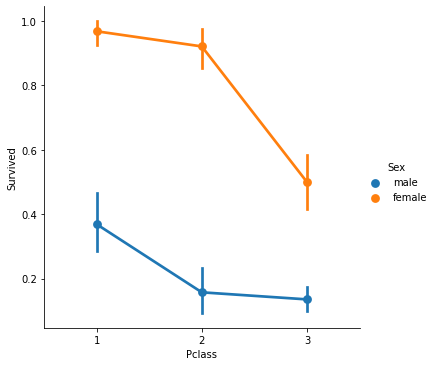

In [50]:
sns.factorplot('Pclass','Survived',hue='Sex',data=train_df)
plt.show()

*Almost all the women (% 97) in the 1st class survived.
*Although the number of passengers in the 2nd class is less than the number of passengers in the 1st class, the number of survivors in the 1st class is higher.

### 4.What are the Passengers' survival percentages for passengers with parents / children on board?

### 5. What is the number of survivors and non-survivors among siblings and spouse(except mistresses and fiancés )? 

In [44]:
pd.crosstab([train_df.SibSp],train_df.Survived).style.background_gradient(cmap='summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


/home/criuser/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/criuser/.local/lib/python3.8/site-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/home/criuser/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.

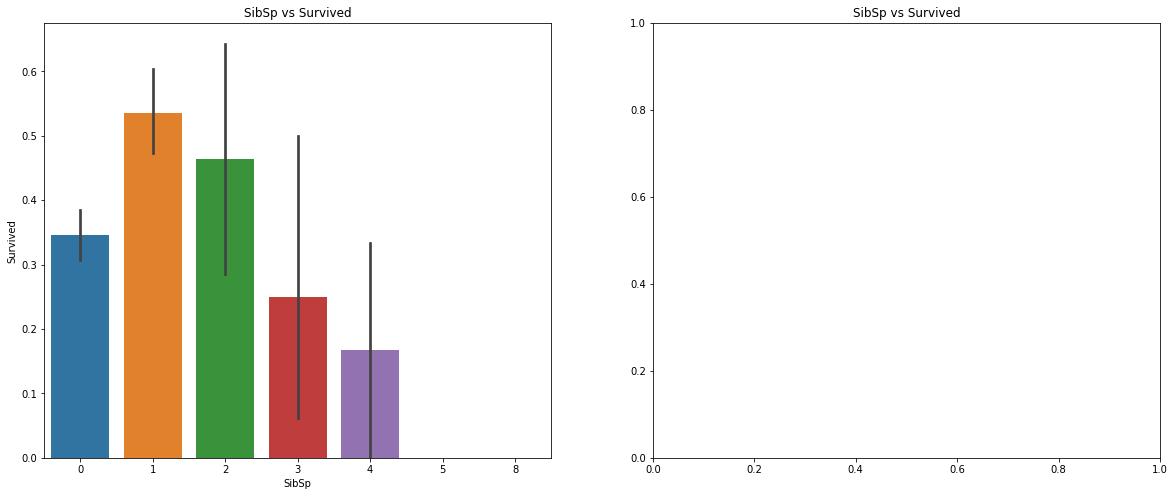

In [53]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot('SibSp','Survived',data=train_df,ax=ax[0])
ax[0].set_title('SibSp vs Survived')
sns.factorplot('SibSp','Survived',data=train_df,ax=ax[1])
ax[1].set_title('SibSp vs Survived')
plt.close(2)
plt.show()

### Visualization

In [76]:
#Sex and Embarked columns to check if there's any correlation between them and the Survived data

train_df['Sex_data'] = train_df['Sex'].map({'male': 1,'female': 0})
train_df['Embarked_data'] = train_df['Embarked'].map({'S': 0,'C': 1, 'Q': 2})



In [74]:
train_df.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Sex_data,Embarked_data
PassengerId,1.000000,-0.005007,-0.035144,0.042939,0.036847,-0.057527,-0.001652,0.012658,-0.030555,NaN,NaN
Survived,-0.005007,1.000000,-0.338481,-0.543351,-0.077221,-0.035322,0.081629,0.257307,0.108669,NaN,NaN
Pclass,-0.035144,-0.338481,1.000000,0.131900,-0.369226,0.083081,0.018443,-0.549500,0.043835,NaN,NaN
Sex,0.042939,-0.543351,0.131900,1.000000,0.093254,-0.114631,-0.245489,-0.182333,-0.118593,NaN,NaN
Age,0.036847,-0.077221,-0.369226,0.093254,1.000000,-0.308247,-0.189119,0.096067,0.012186,NaN,NaN
SibSp,-0.057527,-0.035322,0.083081,-0.114631,-0.308247,1.000000,0.414838,0.159651,-0.060606,NaN,NaN
Parch,-0.001652,0.081629,0.018443,-0.245489,-0.189119,0.414838,1.000000,0.216225,-0.079320,NaN,NaN
Fare,0.012658,0.257307,-0.549500,-0.182333,0.096067,0.159651,0.216225,1.000000,0.063462,NaN,NaN
Embarked,-0.030555,0.108669,0.043835,-0.118593,0.012186,-0.060606,-0.079320,0.063462,1.000000,NaN,NaN
Sex_data,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0.5, 1.0, 'Correlation')

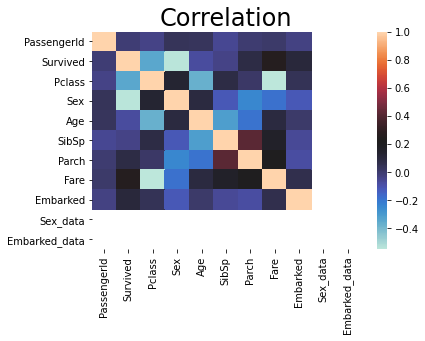

In [73]:
sns.heatmap(train_df.corr(), cmap='icefire')
plt.title('Correlation', fontsize=24)

*In our analysis we see a low correlation between embarked and sex.

In [59]:
#Visualization of 'Survived' (Target column)
train_df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

Text(0, 0.5, 'Passenger Count')

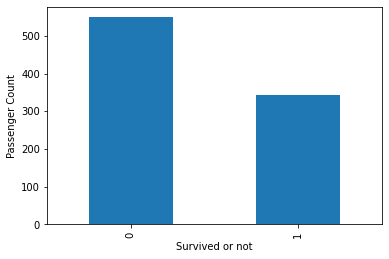

In [62]:


train = train_df.Survived.value_counts().plot(kind='bar')
train.set_xlabel('Survived or not')
train.set_ylabel('Passenger Count')



*Based on the information we have, we can see that only 342 people out of 891 passengers survived on our graph.

Text(0, 0.5, 'Survival Probability')

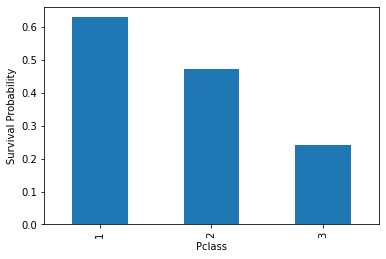

In [64]:
train = train_df[['Pclass', 'Survived']].groupby('Pclass').mean().Survived.plot(kind='bar')
train.set_xlabel('Pclass')
train.set_ylabel('Survival Probability')

*Based on the information we have, we can see that first class has the most survived passengers.